In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import ensemble

(a) Use the Boston data set to create a training set. Recall the 'label' of each point in this data set is the target value, namely the median value of owner occupied homes. Let $M$ be the average value of the target value over the entire data set. Compute $M$.

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]
M = np.mean(y)
print('The average(rounded to 3 decimal places) is {}'.format(round(M, 3)))

The average(rounded to 3 decimal places) is 22.533


(b) The goal is to build a decision tree that, based on the other features in the set, predicts whether the target value will be greater than or equal to $M$ (or less than $M$).  So, this is a classification problem.   Using any tree-based methods in the scikit-learn library, build a decision tree and report its error using 10-fold cross accuracy.  For full credit your cross-validated accuracy must be at least $70\%$.  Vary the depth of your decision tree and plot its cross-validated accuracy (as a function of the depth). Please use depth = $1, 2, \dots, 10$.

Depth -> Error
1 -> 20.31%
2 -> 17.38%
3 -> 18.745%
4 -> 22.494%
5 -> 23.082%
6 -> 24.063%
7 -> 24.647%
8 -> 25.235%
9 -> 25.039%
10 -> 27.412%
Since the errors for all the depths are lesser than 30%, the
accuracy scores for all the depths are greater than 70%


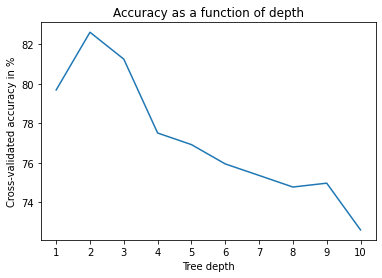

In [3]:
y = (y >= M).astype(int) # normalizing so that label values are either 0 or 1
tree_depths = list(range(1, 11))
scores = []
for tree_depth in tree_depths:
  clf = tree.DecisionTreeClassifier(max_depth=tree_depth, random_state=0)
  score = cross_val_score(clf, X, y, cv=10).mean()
  scores.append(score * 100)
print("Depth -> Error")
for depth, accuracy in zip(tree_depths, scores):
  print("{} -> {}%".format(depth, round(100 - accuracy, 3)))
msg = """Since the errors for all the depths are lesser than 30%, the
accuracy scores for all the depths are greater than 70%"""
print(msg)
plt.plot(tree_depths, scores)
plt.xticks(tree_depths)
plt.xlabel('Tree depth')
plt.ylabel('Cross-validated accuracy in %')
plt.title("Accuracy as a function of depth")
plt.show()

(c) Now try the random forest classifier of the scikit-learn library and use the best depth you get from (b) as $max\_depth$. Vary the number of trees in the forest via the parameter $n\_estimators$ and plot its cross-validated accuracy (use $n\_estimators = 1, 2, \dots, 20$). Do you see an improvement using random forests versus using a single tree (Note: set $n\_estimators=1$ to see the result for a single tree instead of using the result in (b))?

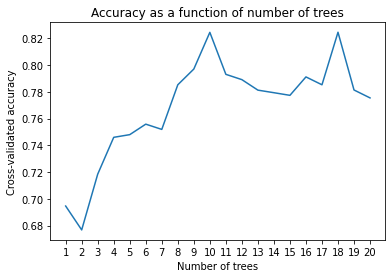

We see an improvement when using random forests versus a single tree.
The accuracy scores are greater compared to that of a single tree when using more trees,
except when the number of trees equals 2.


In [4]:
max_depth = scores.index(max(scores)) + 1
n_estimators_values = list(range(1, 21))
n_estimators_scores = []
for n_estimators in n_estimators_values:
  clf = ensemble.RandomForestClassifier(n_estimators=n_estimators, 
                                        max_depth=max_depth, random_state=0)
  score = cross_val_score(clf, X, y, cv=10).mean()
  n_estimators_scores.append(score)
plt.plot(n_estimators_values, n_estimators_scores)
plt.xticks(n_estimators_values)
plt.xlabel('Number of trees')
plt.ylabel('Cross-validated accuracy')
plt.title("Accuracy as a function of number of trees")
plt.show()
msg = """We see an improvement when using random forests versus a single tree.
The accuracy scores are greater compared to that of a single tree when using more trees,
except when the number of trees equals 2."""
print(msg)

(d) Using the method for building a decision tree you used in part (b), build a tree but randomly hold out a $.2$,$.4$,$.6$, and $.8$ fraction of the data set (so you will need to build 4 different trees for each depth value).  Report the test error (the error on the held-out set) for each decision tree.  Plot the error.

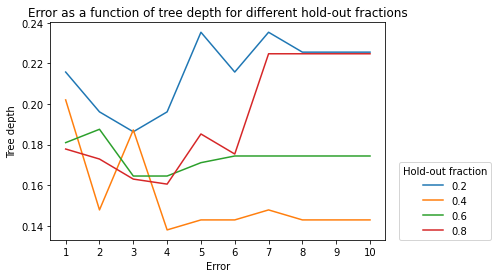

Errors: Depth -> Error
----------------------

Hold-out fraction : 0.2

1 -> 0.216
2 -> 0.196
3 -> 0.186
4 -> 0.196
5 -> 0.235
6 -> 0.216
7 -> 0.235
8 -> 0.225
9 -> 0.225
10 -> 0.225
----------------------

Hold-out fraction : 0.4

1 -> 0.202
2 -> 0.148
3 -> 0.187
4 -> 0.138
5 -> 0.143
6 -> 0.143
7 -> 0.148
8 -> 0.143
9 -> 0.143
10 -> 0.143
----------------------

Hold-out fraction : 0.6

1 -> 0.181
2 -> 0.188
3 -> 0.164
4 -> 0.164
5 -> 0.171
6 -> 0.174
7 -> 0.174
8 -> 0.174
9 -> 0.174
10 -> 0.174
----------------------

Hold-out fraction : 0.8

1 -> 0.178
2 -> 0.173
3 -> 0.163
4 -> 0.16
5 -> 0.185
6 -> 0.175
7 -> 0.225
8 -> 0.225
9 -> 0.225
10 -> 0.225
----------------------




In [5]:
hold_sizes = [0.2, 0.4, 0.6, 0.8]
hold_size_depth_errors = []
for hold_size in hold_sizes:
  depth_errors = []
  for tree_depth in tree_depths:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=hold_size, 
                                                        random_state=0)
    clf = tree.DecisionTreeClassifier(max_depth=tree_depth, random_state=0)
    clf.fit(X_train, y_train)
    error = 1 - (accuracy_score(y_test, clf.predict(X_test)))
    depth_errors.append(error)
  hold_size_depth_errors.append(depth_errors)
report = "Errors: Depth -> Error\n"
report += "----------------------\n\n"
for hold_size, depth_errors in zip(hold_sizes, hold_size_depth_errors):
  report += "Hold-out fraction : {}\n\n".format(hold_size)
  for depth, error in zip(tree_depths, depth_errors):
    report += "{} -> {}\n".format(depth, round(error,3))
  report += "----------------------\n\n"
  plt.plot(tree_depths, depth_errors, label=hold_size)
plt.xticks(tree_depths)
plt.xlabel('Error')
plt.ylabel('Tree depth')
plt.title('Error as a function of tree depth for different hold-out fractions')
plt.legend(loc=(1.04, 0), title='Hold-out fraction')
plt.show()
print(report)